# Ch12_1.워드클라우드와 텍스트마이닝

## 1.기본 package 설정
- 한글을 사용하기 위해 세종사전을 이용
- 세종사전이 세팅되지 않을 때는 JAVA jdk를 설치해야 함
- pip install konlpy
- pip install wordcloud


In [1]:
## 기본
import numpy as np  # numpy 패키지 가져오기
import pandas as pd # pandas 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기

## 데이터 전처리
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud

## 2.데이터 가져오기

### 2.1 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [2]:
df = pd.read_csv('data.csv', encoding = 'cp949')
df.head()

,번호,재학생구분,학년/학기,학과,성별,text
0,65,대학,1,인문계열,여,1학기 때 책 읽으려고 갔는데 먼지가 있었어요. 그래서 책상에 먼지가 없었으면 좋겠어요.
1,78,대학,3,사회계열,여,KC대학교도서관 재건축해주세요
2,100,대학,1,사회계열,여,개인스터디할공간이 필요
3,129,대학,4,인문계열,여,"건물 재건축 및 교체, 내부 리모델링"
4,37,대학,2,인문계열,남,공부를 할 수 있는 시설이 개선되었으면 좋겠습니다


## 3.명사단어 추출

### 3.1 세종사전 실행

In [3]:
from konlpy.tag import Twitter
twitter = Twitter()

C:\Users\leecho\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')
C:\Users\leecho\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


### 3.2 단어 리스트 만들기

In [4]:
word_list = []
word_list =df['text']

### 3.3 형태소 분리

In [5]:
sentences_tag = []

for sentence in word_list:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)

print(morph)

[('해당', 'Noun'), ('학기', 'Noun'), ('에', 'Josa'), ('쓰는', 'Verb'), ('전', 'Modifier'), ('공책', 'Noun'), ('등', 'Noun'), ('을', 'Josa'), ('구비', 'Noun'), ('하고', 'Josa'), (',', 'Punctuation'), ('그', 'Noun'), ('외', 'Noun'), ('에도', 'Josa'), ('최신', 'Noun'), ('도서', 'Noun'), ('들', 'Suffix'), ('이', 'Josa'), ('들어왔으면', 'Verb'), ('좋겠다', 'Adjective')]


### 3.4. 명사만 추출

In [6]:
noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ['Noun']:
            noun_list.append(word)

### 3.5 두 단어 이상만 추출

In [7]:
len(noun_list)

noun_list = [n for n in noun_list if len(n) > 1]
noun_list[:100]

['학기',
 '먼지',
 '책상',
 '먼지',
 '대학교',
 '도서관',
 '재건축',
 '개인',
 '스터디',
 '공간',
 '필요',
 '건물',
 '재건축',
 '교체',
 '내부',
 '모델링',
 '공부',
 '시설',
 '개선',
 '공부',
 '공간',
 '마련',
 '공간',
 '차서',
 '공간',
 '보통',
 '다른',
 '대학',
 '모든',
 '학생',
 '공부',
 '저희',
 '고등학교',
 '저희',
 '학교',
 '자부심',
 '논문',
 '열람',
 '사이트',
 '학교',
 '계해',
 '학생',
 '이용',
 '또한',
 '도서관',
 '독서실',
 '시설',
 '변경',
 '제발',
 '대출',
 '불가',
 '도서',
 '대여',
 '복사기',
 '대여',
 '복사',
 '복사',
 '대학원',
 '전공',
 '관련',
 '국내외',
 '참고도서',
 '구비',
 '도서관',
 '도서관',
 '컴퓨터',
 '공간',
 '다른',
 '공간',
 '공기',
 '조금',
 '기침',
 '정도',
 '먼지털이',
 '걸레',
 '한번',
 '청소',
 '공기청정기',
 '설치',
 '도서관',
 '건물',
 '시설',
 '개설',
 '도서관',
 '모델링',
 '낙후',
 '도서관',
 '책장',
 '도서관',
 '공간',
 '경우',
 '사람',
 '생각',
 '우리',
 '학교',
 '도서관',
 '매우',
 '우리',
 '학교',
 '도서관']

### 3.6 단어 카운트

In [8]:
counts = Counter(noun_list)
tags = counts.most_common(30)
tags

[('도서관', 36),
 ('공간', 28),
 ('공부', 17),
 ('시설', 12),
 ('학교', 12),
 ('학생', 11),
 ('도서', 11),
 ('이용', 10),
 ('환경', 9),
 ('최신', 9),
 ('생각', 8),
 ('자료', 8),
 ('열람', 7),
 ('조금', 7),
 ('학습', 6),
 ('개선', 5),
 ('다른', 5),
 ('먼지', 4),
 ('개인', 4),
 ('건물', 4),
 ('관련', 4),
 ('우리', 4),
 ('부분', 4),
 ('학기', 3),
 ('스터디', 3),
 ('모델링', 3),
 ('마련', 3),
 ('대학', 3),
 ('저희', 3),
 ('전공', 3)]

## 4.WordCloud생성

{'도서관': 36, '공간': 28, '공부': 17, '시설': 12, '학교': 12, '학생': 11, '도서': 11, '이용': 10, '환경': 9, '최신': 9, '생각': 8, '자료': 8, '열람': 7, '조금': 7, '학습': 6, '개선': 5, '다른': 5, '먼지': 4, '개인': 4, '건물': 4, '관련': 4, '우리': 4, '부분': 4, '학기': 3, '스터디': 3, '모델링': 3, '마련': 3, '대학': 3, '저희': 3, '전공': 3}


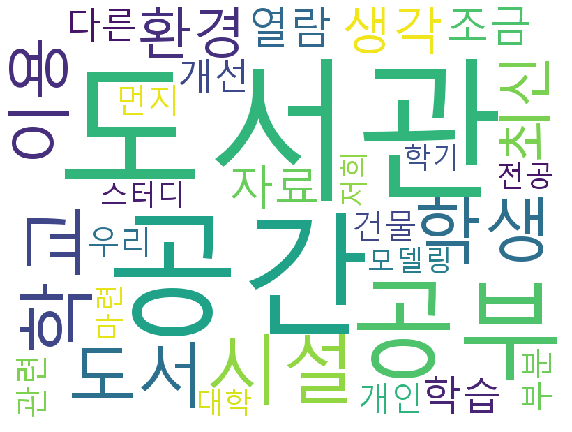

In [9]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white',
                      width=800,
                      height=600)

print(dict(tags))

cloud = wordcloud.generate_from_frequencies(dict(tags))
plt.figure(figsize=(10, 8))
plt.axis('off')
plt.imshow(cloud)
plt.show()